In [ ]:
pip install matplotlib seaborn

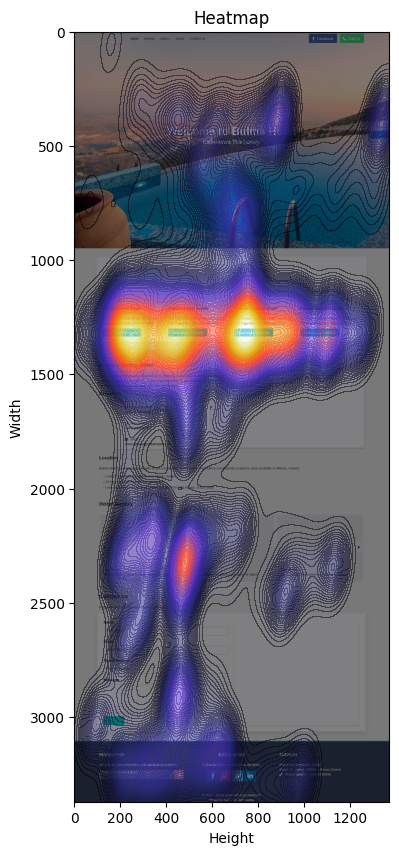

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

with open('positions.json', 'r') as file:
    data = json.load(file)

page_width = data[0]['width']
page_height = data[0]['height']

positions = [(entry['x'], entry['y']) for entry in data[1:] if 'x' in entry and 'y' in entry]

x, y = zip(*positions)

background = Image.open('sample.jpg')
background = background.resize((page_width, page_height))

aspect_ratio = page_width / page_height

plt.figure(figsize=(10 * aspect_ratio, 10))
plt.imshow(background, extent=[0, page_width, page_height, 0], aspect='auto')

sns.kdeplot(x=x, y=y, cmap='CMRmap', fill=True, bw_adjust=0.5, alpha=0.5, clip=((0, page_width), (0, page_height)), thresh=0, levels=100)

plt.title('Heatmap')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()


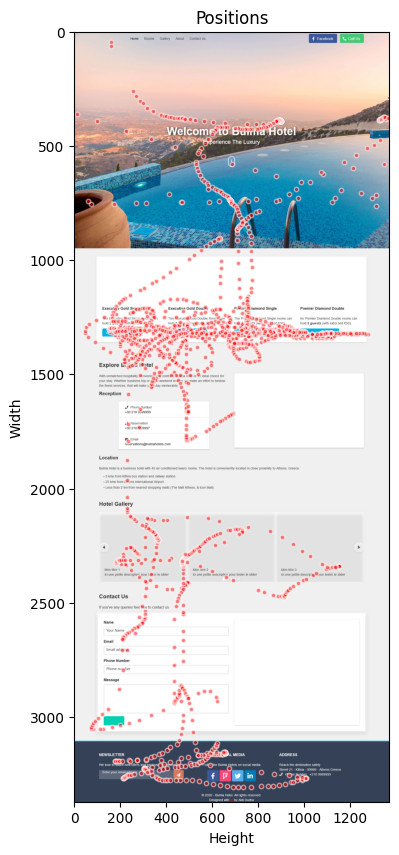

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('positions.json', 'r') as file:
    data = json.load(file)

page_width = data[0]['width']
page_height = data[0]['height']

positions = [(entry['x'], entry['y']) for entry in data[1:] if 'x' in entry and 'y' in entry]

heatmap_data = np.zeros((page_height, page_width))

for x, y in positions:
    heatmap_data[y, x] += 1

x, y = zip(*positions)

background = Image.open('sample.jpg')
background = background.resize((page_width, page_height))

aspect_ratio = page_width / page_height

plt.figure(figsize=(10 * aspect_ratio, 10))
plt.imshow(background, extent=[0, page_width, page_height, 0], aspect='auto')

plt.scatter(x=x, y=y, c='red', s=10, alpha=0.5, edgecolor='white')

plt.title('Positions')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()